In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns

# import from scripts
import os
os.chdir(os.path.expanduser("C:\\Users\\ipoch\\Documents\\repos\\isttc\\scripts"))
from calculate_acf import acf_sttc_trial_avg

### Load data

In [3]:
area = 'pfp'

results_folder = 'D:\\projects_q_30_10_2024\\isttc\\results\\monkey\\'
# save_folder = results_folder + 'fixation_period_1000ms\\non_binned\\' + area + '\\acf\\'

save_folder = results_folder + 'fixation_period_1000ms\\tests_after_refac\\'

csv_data_file_pfdl = results_folder + 'data_' + area + '_fixon_1500ms_no_empty_fixation.csv'
with open(csv_data_file_pfdl, newline='') as f:
    reader = csv.reader(f)
    sua_list_pfdl = list(reader)
    
n_spike_trains_pfdl = len(sua_list_pfdl)
print('N spike_trains in {} fixON {}'.format(area, n_spike_trains_pfdl))

N spike_trains in pfp fixON 27717


In [9]:
save_folder = results_folder + 'fixation_period_1000ms\\tests_after_refac\\'

In [4]:
# temp solution here - I need to know how many trials are per unit so make a df here with unit_id, trial_id, condition_id

unit_id_l, trial_id_l, condition_id_l = [],[],[]
for spike_train in sua_list_pfdl:
    unit_id_l.append(spike_train[0])
    trial_id_l.append(spike_train[1])
    condition_id_l.append(spike_train[1])

unit_trials_df = pd.DataFrame(np.vstack((unit_id_l, trial_id_l, condition_id_l)).T, columns=['unit_id', 'trial_id', 'condition_id'])
unit_trials_cound_df = unit_trials_df.groupby(by='unit_id', as_index=False)['trial_id'].count()
unit_trials_cound_df.rename(columns={'trial_id': 'trial_count'}, inplace=True)
unit_trials_cound_df['unit_id'] = unit_trials_cound_df['unit_id'].astype(int)
unit_trials_cound_df['trial_count'] = unit_trials_cound_df['trial_count'].astype(int)
unit_trials_cound_df.sort_values(by='unit_id', inplace=True)

n_units = len(unit_trials_cound_df)
print('N units {}'.format(n_units))

unit_trials_cound_df

N units 543


,unit_id,trial_count
0,0,85
1,1,17
112,2,27
223,3,40
334,4,28
...,...,...
488,538,32
489,539,19
491,540,12
492,541,23


In [5]:
units_dict = {}
unit_id_l = unit_trials_cound_df['unit_id'].values

for unit in unit_id_l:
    units_dict[unit] = []

for spike_train in sua_list_pfdl:
    spike_train_ = np.asarray(spike_train[3:]).astype(int)
    spike_train_1000 = spike_train_[spike_train_ <= 1000]
    units_dict[int(spike_train[0])].append(spike_train_1000)

### Calc trial average style

In [7]:
acf_average_trial_l = []
acf_matrix_l = []
unit_id_calc_l = []

for k,v in units_dict.items():
    print('Processing unit {}, n trials {}'.format(k, len(v)))

    if len(v) <= 1:
        print('ONLY 1 TRIAL: can not calculate, skipping...')
    else:
        acf_matrix, acf_average = acf_matrix, acf_average = acf_sttc_trial_avg(v)
        acf_average_trial_l.append(acf_average)
        acf_matrix_l.append(acf_matrix)
        unit_id_calc_l.append(k)

acf_cols = ['acf_' + str(i) for i in range(20)]
acf_average_trial_df = pd.DataFrame(np.array(acf_average_trial_l), columns=acf_cols)
acf_average_trial_df.insert(0, 'unit_id', unit_id_calc_l)

print('NaNs in acf {}'.format(acf_average_trial_df.isnull().any().any()))
acf_average_trial_df.head(3)

Processing unit 0, n trials 85
n_bins to use 20
0 12650 85
STTC : 0.12857719565802458
STTC : -0.03118577075098814
STTC : 0.10369644598096317
STTC : 0.1311238704510495
STTC : 0.08954779000551871
STTC : -0.03031620553359684
STTC : -0.02569169960474308
STTC : -0.023715415019762848
STTC : 0.11028296902148482
STTC : -0.03470355731225296
STTC : -0.03241106719367589
STTC : -0.03525691699604743
STTC : -0.033241106719367586
STTC : -0.02964426877470356
STTC : -0.02766798418972332
STTC : 0.21397868778288912
STTC : -0.032885375494071147
STTC : -0.02964426877470356
STTC : -0.02766798418972332
STTC : 0.23025917817352332
STTC : 0.23605161166456234
STTC : 0.07823999544070426
STTC : 0.20954426463209758
STTC : 0.06303873666128282
STTC : -0.03359683794466403
STTC : -0.03162055335968379
STTC : 0.057419201015453905
STTC : -0.042608695652173914
STTC : -0.04031620553359684
STTC : 0.04593494145833242
STTC : 0.04794760348246867
STTC : -0.03754940711462451
STTC : 0.07583774250440917
STTC : 0.11382011723751384
S

,unit_id,acf_0,acf_1,acf_2,acf_3,acf_4,acf_5,acf_6,acf_7,acf_8,...,acf_10,acf_11,acf_12,acf_13,acf_14,acf_15,acf_16,acf_17,acf_18,acf_19
0,0,1.0,0.149503,0.090789,0.107328,0.142620,0.069971,0.040691,0.019864,0.044535,...,0.037815,0.014939,0.067810,0.035148,0.071576,0.086282,0.092043,0.015594,0.023097,-0.027668
1,1,1.0,0.074197,0.201763,0.042812,0.067938,0.013455,0.147597,0.058625,0.112259,...,0.113567,-0.016825,0.040307,-0.009213,-0.010748,-0.006122,0.000000,-0.014694,0.000000,0.000000
2,2,1.0,0.205520,0.159651,0.085781,0.139482,0.117954,0.114761,0.075289,0.074045,...,0.148084,0.050156,0.052800,0.073057,-0.041139,-0.040886,-0.004934,0.001037,-0.034241,0.000000


In [10]:
acf_average_trial_df.to_pickle(save_folder + 'acf_average_trial_sttc_50ms_20lags_df.pkl')
np.save(save_folder + 'acf_matrix_l_sttc_50ms_20lags_df.npy', acf_matrix_l)

In [ ]:
#acf_matrix, acf_average = acf_sttc_trial_avg(v, verbose=True)

### Plotting

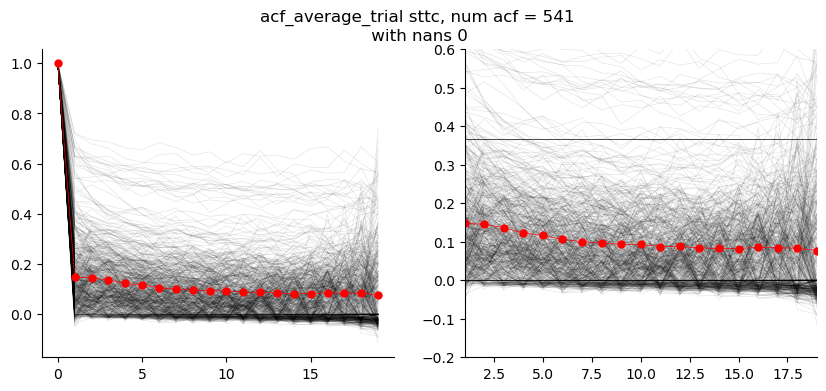

In [11]:
n_nans_acf_average_trial_df= acf_average_trial_df.isna().any(axis=1).sum()

fig, axes = plt.subplots(1,2, figsize=(10,4))

for acf_ in range(len(acf_average_trial_df)):
    axes[0].plot(acf_average_trial_df[acf_cols].values[acf_, :], lw=0.5, c='k', alpha=0.1)
axes[0].plot(np.nanmean(acf_average_trial_df[acf_cols].values, axis=0), c='r', lw=0.5 ,marker='o', markersize='5')
# axes[0].axhline(y=0, lw=0.5, color='k')
# axes[0].axhline(y=1/np.e, lw=0.5, color='k')

for acf_ in range(len(acf_average_trial_df)):
    axes[1].plot(acf_average_trial_df[acf_cols].values[acf_, :], lw=0.5, c='k', alpha=0.1)
axes[1].plot(np.nanmean(acf_average_trial_df[acf_cols].values, axis=0), c='r', lw=0.5 ,marker='o', markersize='5')
axes[1].axhline(y=0, lw=0.5, color='k')
axes[1].axhline(y=1/np.e, lw=0.5, color='k')
axes[1].set_xlim([1,19])
axes[1].set_ylim([-0.2,0.6])

fig.suptitle('acf_average_trial sttc, num acf = ' + str(len(acf_average_trial_df)) + '\n with nans ' 
             + str(n_nans_acf_average_trial_df))

sns.despine()
#fig.savefig(save_folder + 'acf_average_trial_sttc_50ms_20lags.png' , bbox_inches='tight')

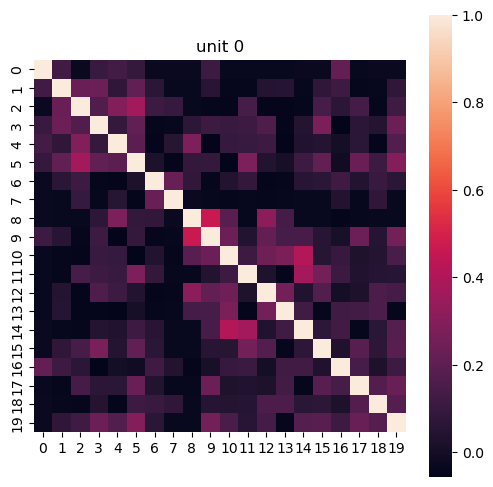

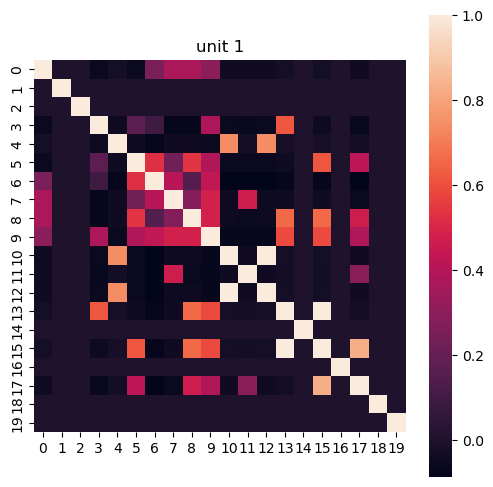

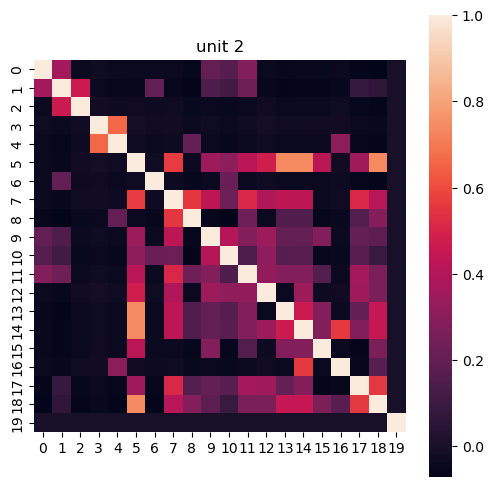

In [13]:
for idx_, acf_matrix_ in enumerate(acf_matrix_l[:3]):
    fig, axes = plt.subplots(1,1,figsize=(6,6))
    acf_matrix_plot = acf_matrix_.T + acf_matrix_
    np.fill_diagonal(acf_matrix_plot, 1)
    sns.heatmap(acf_matrix_plot, ax=axes)
    axes.set_aspect('equal', adjustable='box')
    axes.set_title('unit ' + str(int(acf_average_trial_df.iloc[idx_]['unit_id'])))
    fig.savefig(save_folder + 'acf_matrices\\unit_' + str(int(acf_average_trial_df.iloc[idx_]['unit_id'])), bbox_inches='tight')